<a href="https://colab.research.google.com/github/KastoneX/ocr/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1) docTR


In [ ]:
!pip install python-doctr[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,202 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-freefont-ttf all 20120503-7 [4,202 kB]
Fetched 4,202 kB in 1s (4,894 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend

In [ ]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
doc = DocumentFile.from_images("/content/0.jpeg")

In [ ]:
predictor = ocr_predictor(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/101971449 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [ ]:
result = predictor(doc)

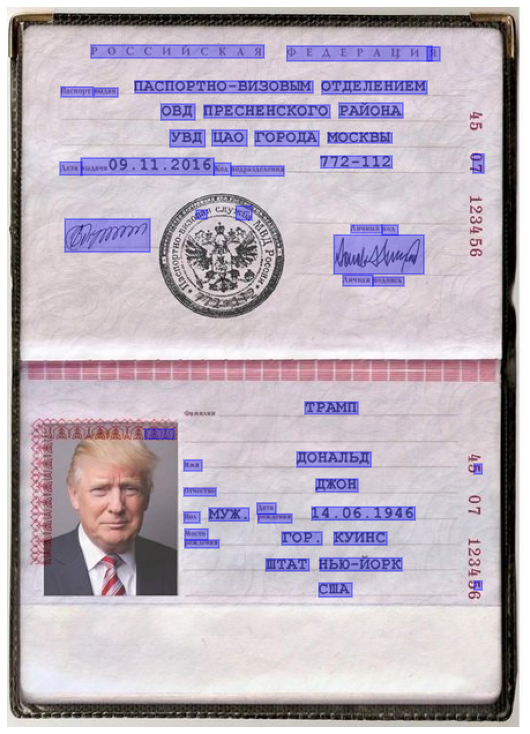

In [ ]:
result.show(doc)

1.2) easyocr

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 47.6 MB 115 kB/s 
     |████████████████████████████████| 145 kB 62.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/1.jpeg")

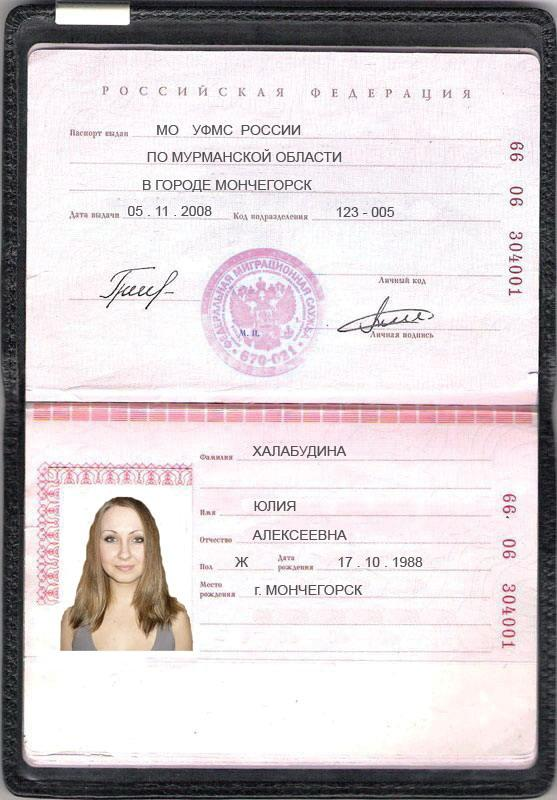

In [ ]:
im

In [ ]:
import easyocr
reader = easyocr.Reader(['ru','en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
bounds = reader.readtext('/content/1.jpeg')
bounds

[([[157, 85], [251, 85], [251, 99], [157, 99]],
  '€ Ии € к',
  0.41777154645661724),
 ([[255, 85], [287, 85], [287, 99], [255, 99]], '4 Я', 0.7265698145495784),
 ([[309, 87], [435, 87], [435, 103], [309, 103]],
  'Ф Е4 ₽ ₽ А ц',
  0.6529842141871007),
 ([[439, 87], [473, 87], [473, 101], [439, 101]], 'И %', 0.5934271973980816),
 ([[104, 130], [128, 130], [128, 136], [104, 136]],
  ' +1п',
  0.07557123154401779),
 ([[153, 121], [181, 121], [181, 139], [153, 139]], 'мO', 0.32230608592845933),
 ([[191, 123], [303, 123], [303, 139], [191, 139]],
  'УФМС РОССИИ',
  0.689368773946025),
 ([[145, 145], [345, 145], [345, 165], [145, 165]],
  'ПО МУРМАНСКОЙ ОБЛАСТИ',
  0.8709674383276108),
 ([[139, 175], [315, 175], [315, 195], [139, 195]],
  'В ГОРОДЕ МОНЧЕГОРСК',
  0.9723609960564197),
 ([[179, 201], [215, 201], [215, 219], [179, 219]],
  '2008',
  0.6447729546734926),
 ([[335, 205], [361, 205], [361, 219], [335, 219]], '123', 0.9999774252650832),
 ([[371, 205], [397, 205], [397, 219], [371, 

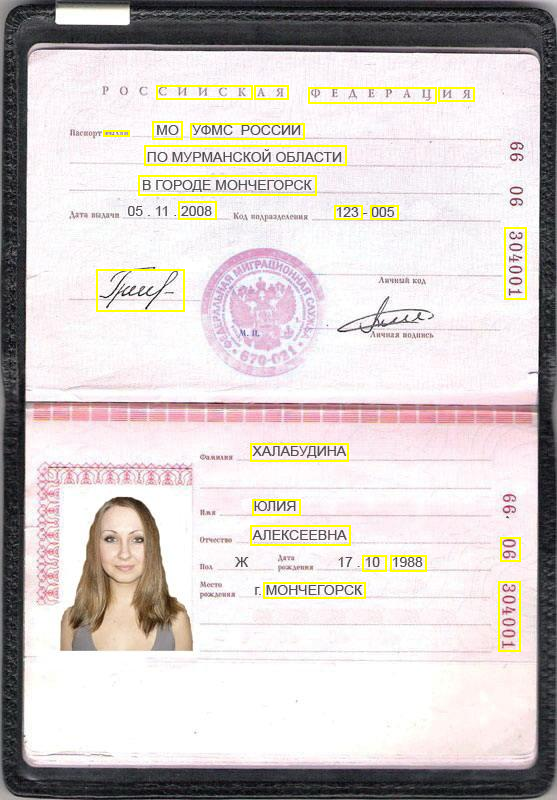

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

Также хочется упомянуть такие библиотеки, как PaddleOCR и TrOCR. Их тоже можно использовать для распознавания текста

### 2) **ocr.space** 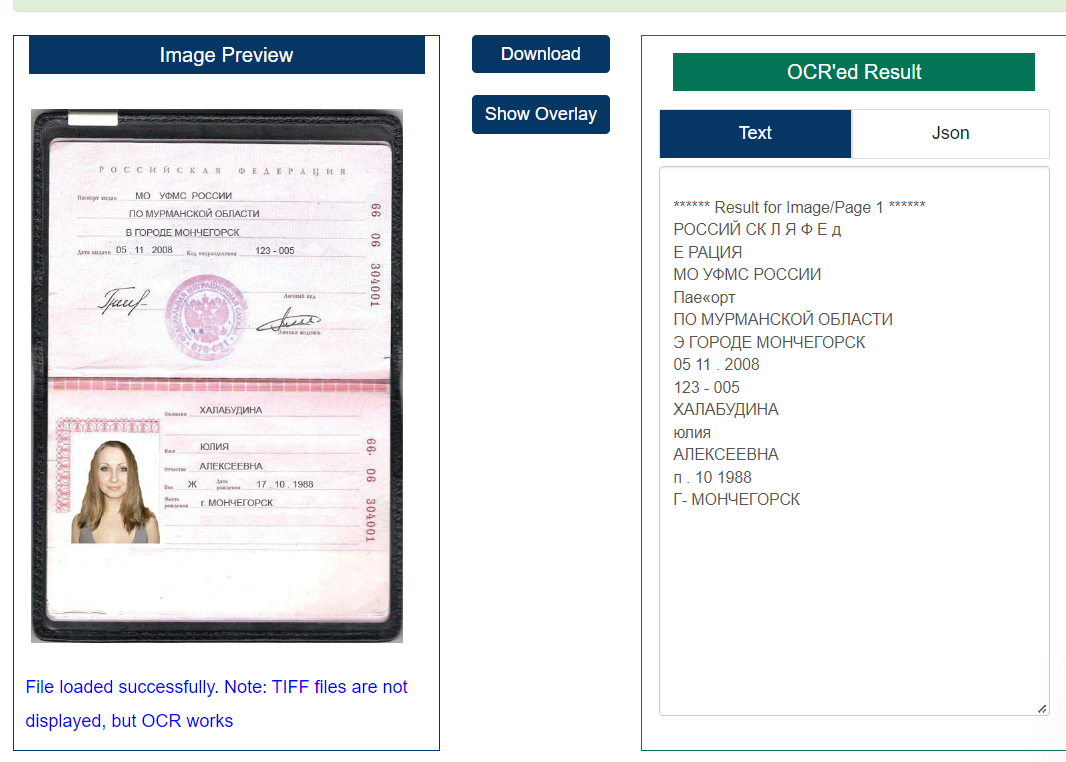

2.2) **problembo.com**
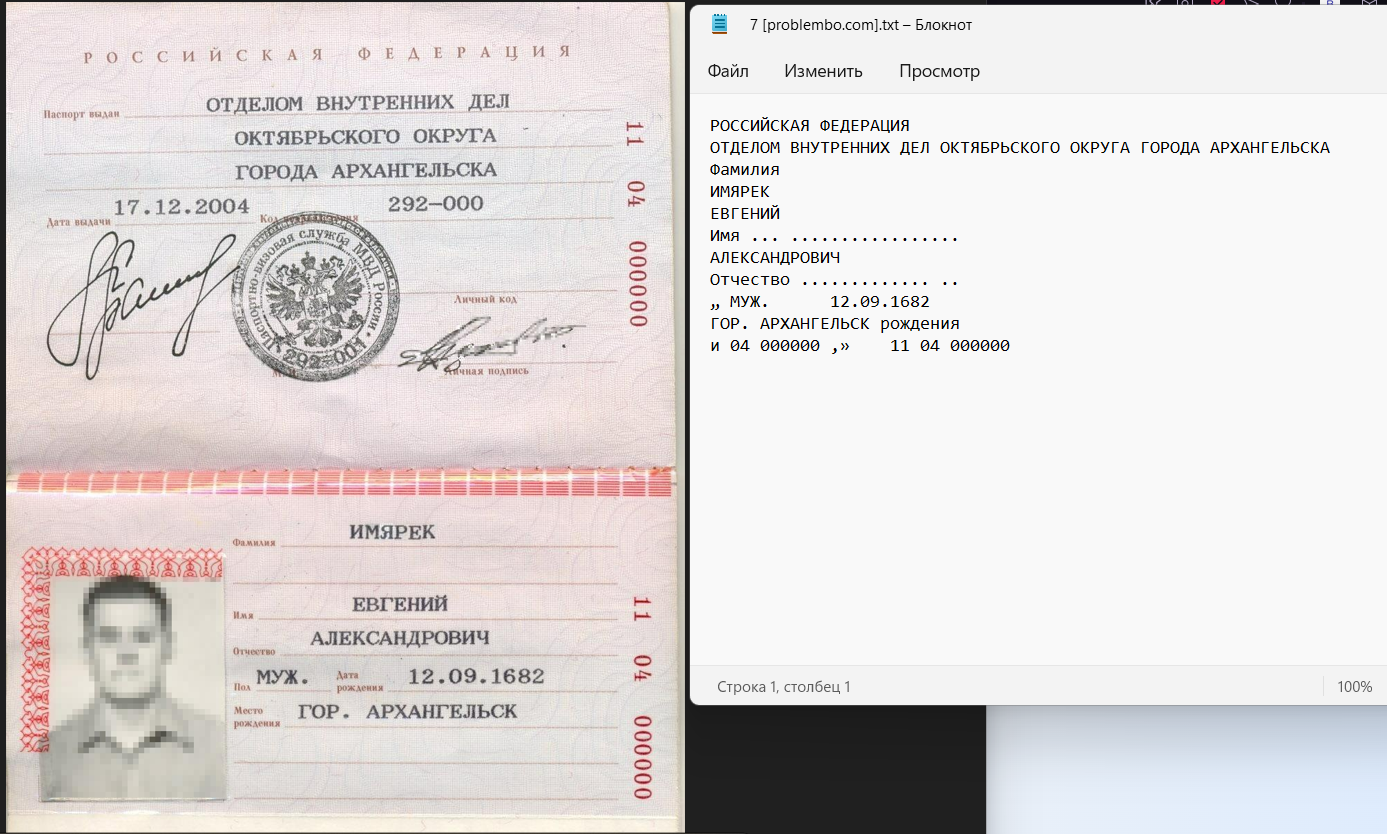